# Flight Price Prediction

## Importing Required Libraries

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing Data

In [2]:
# Importing

df=pd.read_csv("/content/Data_Train.csv")
df_copy=df.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2. Exploring Data

In [3]:
# Dataset Attribute Details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Decription of the Dataset

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


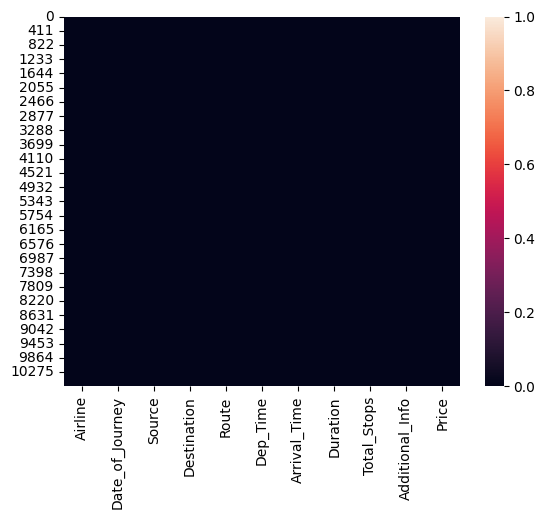

In [5]:
# Visualising Missing Values

sns.heatmap(df.isna(),cbar=True);

In [6]:
# Length of Unique Values in Each Columns

for key,value in df.items():
  if key=="Price":
    break
  print(key," : ",end=" ")
  print(len(df[key].unique()))

Airline  :  12
Date_of_Journey  :  44
Source  :  5
Destination  :  6
Route  :  129
Dep_Time  :  222
Arrival_Time  :  1343
Duration  :  368
Total_Stops  :  6
Additional_Info  :  10


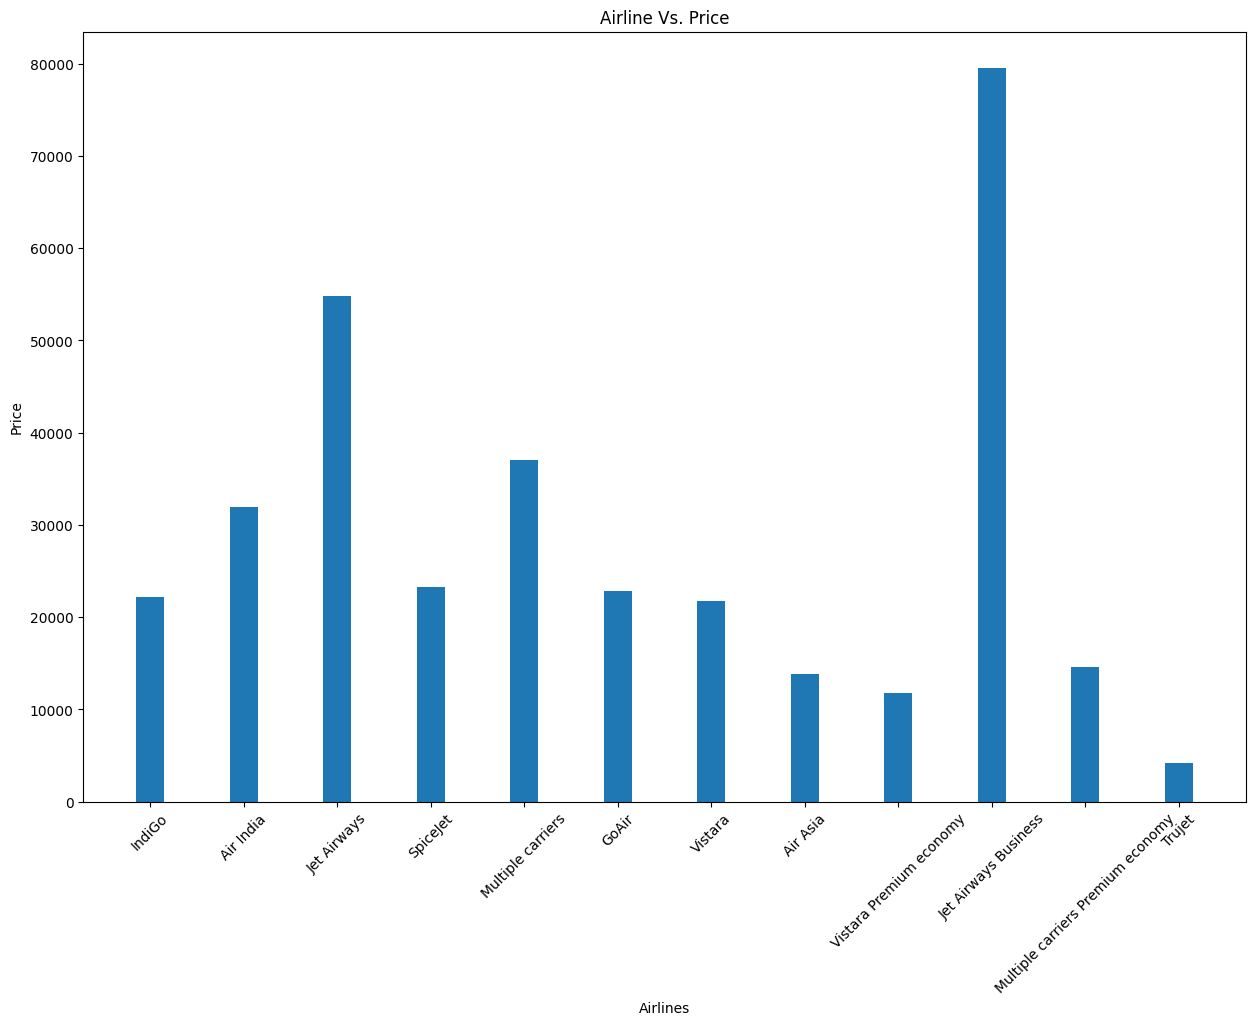

In [7]:
# Airline Vs. Price

plt.figure(figsize=(15,10));
plt.bar(df["Airline"],df["Price"],width=0.3);
plt.xlabel("Airlines");
plt.xticks(rotation=45)
plt.ylabel("Price");
plt.title("Airline Vs. Price");
plt.show();

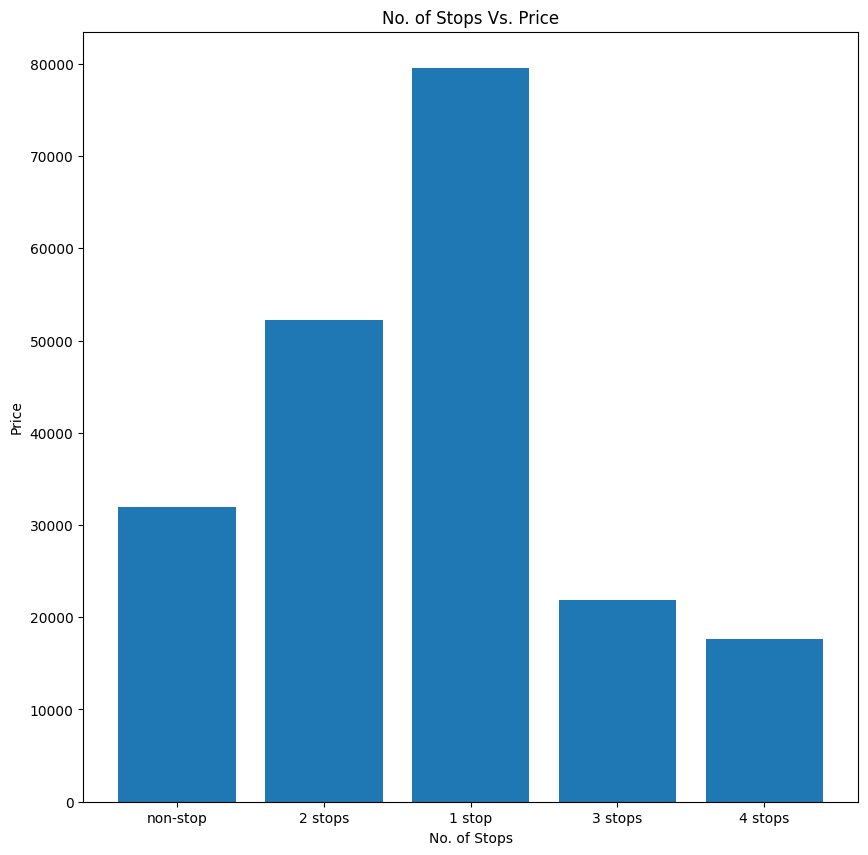

In [8]:
# No. of Stops Vs. Price

plt.figure(figsize=(10,10));
temp_stops=pd.Series(df["Total_Stops"])
temp_stops.fillna("non-stop",inplace=True)
plt.bar(temp_stops,df["Price"]);
plt.xlabel("No. of Stops");
plt.ylabel("Price");
plt.title("No. of Stops Vs. Price");
plt.show();

## 3. Data Cleaning

### 3.1. Filling Missing Values

In [9]:
# Checking Missing Values

df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [10]:
# Finding the Value to Filled in Missing Place

df["Route"].value_counts(),df["Total_Stops"].value_counts()

(Route
 DEL → BOM → COK          2376
 BLR → DEL                1552
 CCU → BOM → BLR           979
 CCU → BLR                 724
 BOM → HYD                 621
                          ... 
 CCU → VTZ → BLR             1
 CCU → IXZ → MAA → BLR       1
 BOM → COK → MAA → HYD       1
 BOM → CCU → HYD             1
 BOM → BBI → HYD             1
 Name: count, Length: 128, dtype: int64,
 Total_Stops
 1 stop      5625
 non-stop    3492
 2 stops     1520
 3 stops       45
 4 stops        1
 Name: count, dtype: int64)

In [11]:
# Filling Missing Value

df["Route"]=df["Route"].fillna("DEL → BOM → COK ")
df["Total_Stops"]=df["Total_Stops"].fillna(" 1 stop")

In [12]:
# Checking Missing Values

df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [13]:
# DataType of Each Column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### 3.2. Converting Object to Integer

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
# Converting Airline Column into Interger

air_uni=df["Airline"].unique()
air_rep={}
j=0
for i in air_uni:
  air_rep[i]=j
  j+=1
df["Airline"]=df["Airline"].replace(air_rep)

<ipython-input-15-90eda33e806f>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Airline"]=df["Airline"].replace(air_rep)


In [16]:
# Converting Date of Journey Column into Interger

date=[]
month=[]
year=[]

for i in df["Date_of_Journey"]:
  spl=i.split("/")
  date.append(int(spl[0]))
  month.append(int(spl[1]))
  year.append(int(spl[2]))
df["Date"]=pd.Series(date)
df["Month"]=pd.Series(month)
df["Year"]=pd.Series(year)
df=df.drop(["Date_of_Journey"],axis=1)

In [17]:
# Converting Source and Destination Column into Interger

sou_uni=df["Source"].unique()
des_uni=df["Destination"].unique()
sou_rep={}
des_rep={}
j=0
for i in sou_uni:
  sou_rep[i]=j
  j+=1
j=0
for i in des_uni:
  des_rep[i]=j
  j+=1
df["Source"]=df["Source"].replace(sou_rep)
df["Destination"]=df["Destination"].replace(des_rep)

<ipython-input-17-735ae6198e82>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Source"]=df["Source"].replace(sou_rep)
<ipython-input-17-735ae6198e82>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Destination"]=df["Destination"].replace(des_rep)


In [18]:
# Droping Route Column

df=df.drop(["Route"],axis=1)

In [19]:
# Droping Depature Time and Arrival Time Column

df=df.drop(["Dep_Time"],axis=1)
df=df.drop(["Arrival_Time"],axis=1)

In [20]:
# Converting Duration Column into Integer

hour=[]
min=[]

for i in df["Duration"]:
  spl=i.split("h")
  if len(spl)>1:
    hour.append(spl[0])
    if spl[1]!="":
      min.append(spl[1][1:-1])
    else:
      min.append("00")
  else:
    hour.append("00")
    min.append(spl[0][:-1])
hm=[]
for i in range(len(hour)):
  hm.append(float(hour[i]+"."+min[i]))

df=df.drop(["Duration"],axis=1)
df["Duration"]=pd.Series(hm)

In [21]:
# Converting No. of Stops Column into Interger

stop_uni=df["Total_Stops"].unique()
stop_rep={}
j=0
for i in stop_uni:
  stop_rep[i]=j
  j+=1
df["Total_Stops"]=df["Total_Stops"].replace(stop_rep)

<ipython-input-21-a08cb70aa867>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"]=df["Total_Stops"].replace(stop_rep)


In [22]:
# Converting Additional_Info Column into Interger

add_uni=df["Additional_Info"].unique()
add_rep={}
j=0
for i in add_uni:
  add_rep[i]=j
  j+=1
df["Additional_Info"]=df["Additional_Info"].replace(add_rep)

<ipython-input-22-92c77785f6dc>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Additional_Info"]=df["Additional_Info"].replace(add_rep)


In [23]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration
0,0,0,0,0,0,3897,24,3,2019,2.50
1,1,1,1,1,0,7662,1,5,2019,7.25
2,2,2,2,1,0,13882,9,6,2019,19.00
3,0,1,1,2,0,6218,12,5,2019,5.25
4,0,0,0,2,0,13302,1,3,2019,4.45


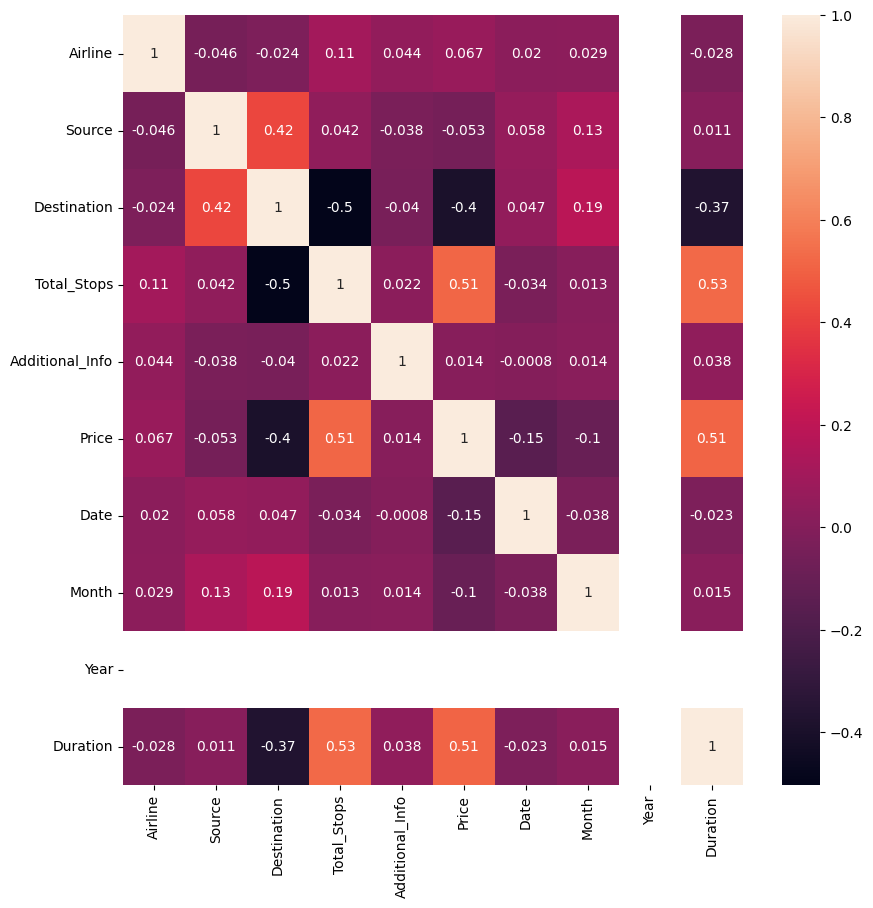

In [24]:
# Correlation Matrix

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

## 4. Modelling

In [25]:
# Splitting Data into X and Y

X=df.drop(["Price"],axis=1)
Y=df["Price"]

# Splitting Data into Trian and Test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [26]:
# Training and validating
def model_predict(model,degree=0):
  if degree==0:
    model=model.fit(X_train,Y_train)
    return (model,model.score(X_test,Y_test))
  else:
    from sklearn.preprocessing import PolynomialFeatures
    poly=PolynomialFeatures(degree=degree) # Creating a Polynomial Equation Model with the Given Degree
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.transform(X_test)
    model=model.fit(X_train_poly,Y_train)
    return model,model.score(X_test_poly,Y_test)

In [27]:
# Importing the Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### 4.1. Linear Regression

In [28]:
lin_model,lin_score=model_predict(LinearRegression())
lin_score

0.38305467120691783

### 4.2. Random Forest Regression

In [29]:
ran_model,ran_score=model_predict(RandomForestRegressor(random_state=0))
ran_score

0.8512518917797764

### 4.3. Support Vector Regressor

In [30]:
svr_model,svr_score=model_predict(SVR())
svr_score

-0.025448578570353986

###  4.4.Polynomial Regression

In [31]:
poly2_model,poly_score_2=model_predict(LinearRegression(),degree=2)
poly3_model,poly_score_3=model_predict(LinearRegression(),degree=3)
poly_score_2,poly_score_3

(0.565296826701718, 0.3605172066272767)

## 5. HyperParameter Tuning

### 1. Random Forest Regressor

In [34]:
# Importing Randomized Search Cv for Hypertuning

from sklearn.model_selection import GridSearchCV

# Hyperparameters to be Used for Tuning
hyperparameters = {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [10, 20, 30],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'max_features': ['auto', 'sqrt', 'log2']
                  }

ran=RandomForestRegressor()
ran_grid=GridSearchCV(estimator=ran, param_grid=hyperparameters, cv=5,verbose=3)
ran_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [35]:
print("Best Parameters:", ran_grid.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [36]:
ran_grid_best=RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features="log2",max_depth=20)
ran_grid_best,ran_score=model_predict(ran_grid_best)
ran_score

0.8449312130843251

## 6. Prediction

### 6.1. Making Predictions on X_test Data

In [37]:
# Making Predictions

Y_pre=ran_model.predict(X_test)
j=0
for i in Y_test:
  print("Actual Value : ",i,"Predicted Value : ",Y_pre[j],"Difference : ",i-Y_pre[j])
print("\n\nMean Actual Value : ",np.mean(Y_test),"Mean Predicted Value : ",np.mean(Y_pre),"Mean Difference : ",np.mean(Y_test)-np.mean(Y_pre))

Actual Value :  11467 Predicted Value :  13228.4 Difference :  -1761.3999999999996
Actual Value :  3841 Predicted Value :  13228.4 Difference :  -9387.4
Actual Value :  22294 Predicted Value :  13228.4 Difference :  9065.6
Actual Value :  12898 Predicted Value :  13228.4 Difference :  -330.39999999999964
Actual Value :  8937 Predicted Value :  13228.4 Difference :  -4291.4
Actual Value :  5277 Predicted Value :  13228.4 Difference :  -7951.4
Actual Value :  6442 Predicted Value :  13228.4 Difference :  -6786.4
Actual Value :  10697 Predicted Value :  13228.4 Difference :  -2531.3999999999996
Actual Value :  16736 Predicted Value :  13228.4 Difference :  3507.6000000000004
Actual Value :  3841 Predicted Value :  13228.4 Difference :  -9387.4
Actual Value :  4995 Predicted Value :  13228.4 Difference :  -8233.4
Actual Value :  7670 Predicted Value :  13228.4 Difference :  -5558.4
Actual Value :  14388 Predicted Value :  13228.4 Difference :  1159.6000000000004
Actual Value :  5797 Predic

In [38]:
# Mapping

print(air_rep)
print(sou_rep)
print(des_rep)
print(stop_rep)
print(add_rep)

{'IndiGo': 0, 'Air India': 1, 'Jet Airways': 2, 'SpiceJet': 3, 'Multiple carriers': 4, 'GoAir': 5, 'Vistara': 6, 'Air Asia': 7, 'Vistara Premium economy': 8, 'Jet Airways Business': 9, 'Multiple carriers Premium economy': 10, 'Trujet': 11}
{'Banglore': 0, 'Kolkata': 1, 'Delhi': 2, 'Chennai': 3, 'Mumbai': 4}
{'New Delhi': 0, 'Banglore': 1, 'Cochin': 2, 'Kolkata': 3, 'Delhi': 4, 'Hyderabad': 5}
{'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, '4 stops': 4}
{'No info': 0, 'In-flight meal not included': 1, 'No check-in baggage included': 2, '1 Short layover': 3, 'No Info': 4, '1 Long layover': 5, 'Change airports': 6, 'Business class': 7, 'Red-eye flight': 8, '2 Long layover': 9}


### 6.2. Making Custom Prediction

In [39]:
columns=["Airline","Source","Destination","Total_Stops","Additional_Info","Date","Month","Year","Duration"]
X_cus=pd.DataFrame()
for i in columns:
  if i!="Duration":
    X_cus[i]=pd.Series(int(input(f"{i} : ")))
  else:
    X_cus[i]=pd.Series(float(input(f"{i} : ")))
Y_cus=ran_model.predict(X_cus)
Y_cus

Airline : 3
Source : 2
Destination : 1
Total_Stops : 1
Additional_Info : 0
Date : 24
Month : 7
Year : 2019
Duration : 6.45


array([16285.43])

### 6.3. Predicting

In [40]:
# Importing Data

df_test_X=pd.read_csv("/content/Test_set.csv")
df_copy_test_X=df_test_X.copy()
df_test_X.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
# Converting Airline Column into Interger

air_uni=df_test_X["Airline"].unique()
air_rep={}
j=0
for i in air_uni:
  air_rep[i]=j
  j+=1
df_test_X["Airline"]=df_test_X["Airline"].replace(air_rep)

# Converting Date of Journey Column into Interger

date=[]
month=[]
year=[]

for i in df_test_X["Date_of_Journey"]:
  spl=i.split("/")
  date.append(int(spl[0]))
  month.append(int(spl[1]))
  year.append(int(spl[2]))
df_test_X["Date"]=pd.Series(date)
df_test_X["Month"]=pd.Series(month)
df_test_X["Year"]=pd.Series(year)
df_test_X=df_test_X.drop(["Date_of_Journey"],axis=1)

# Converting Source and Destination Column into Interger

sou_uni=df_test_X["Source"].unique()
des_uni=df_test_X["Destination"].unique()
sou_rep={}
des_rep={}
j=0
for i in sou_uni:
  sou_rep[i]=j
  j+=1
j=0
for i in des_uni:
  des_rep[i]=j
  j+=1
df_test_X["Source"]=df_test_X["Source"].replace(sou_rep)
df_test_X["Destination"]=df_test_X["Destination"].replace(des_rep)

# Droping Route Column

df_test_X=df_test_X.drop(["Route"],axis=1)

# Droping Depature Time and Arrival Time Column

df_test_X=df_test_X.drop(["Dep_Time"],axis=1)
df_test_X=df_test_X.drop(["Arrival_Time"],axis=1)

# Converting Duration Column into Integer

hour=[]
min=[]

for i in df_test_X["Duration"]:
  spl=i.split("h")
  if len(spl)>1:
    hour.append(spl[0])
    if spl[1]!="":
      min.append(spl[1][1:-1])
    else:
      min.append("00")
  else:
    hour.append("00")
    min.append(spl[0][:-1])
hm=[]
for i in range(len(hour)):
  hm.append(float(hour[i]+"."+min[i]))

df_test_X=df_test_X.drop(["Duration"],axis=1)
df_test_X["Duration"]=pd.Series(hm)

# Converting No. of Stops Column into Interger

stop_uni=df_test_X["Total_Stops"].unique()
stop_rep={}
j=0
for i in stop_uni:
  stop_rep[i]=j
  j+=1
df_test_X["Total_Stops"]=df_test_X["Total_Stops"].replace(stop_rep)

# Converting Additional_Info Column into Interger

add_uni=df_test_X["Additional_Info"].unique()
add_rep={}
j=0
for i in add_uni:
  add_rep[i]=j
  j+=1
df_test_X["Additional_Info"]=df_test_X["Additional_Info"].replace(add_rep)

<ipython-input-41-2e264e353c75>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_X["Airline"]=df_test_X["Airline"].replace(air_rep)
<ipython-input-41-2e264e353c75>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_X["Source"]=df_test_X["Source"].replace(sou_rep)
<ipython-input-41-2e264e353c75>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

In [42]:
df_test_X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Duration
0,0,0,0,0,0,6,6,2019,10.55
1,1,1,1,0,0,12,5,2019,4.00
2,0,0,0,0,1,21,5,2019,23.45
3,2,0,0,0,0,21,5,2019,13.00
4,3,2,2,1,0,24,6,2019,2.50


In [43]:
df_test_Y=ran_model.predict(df_test_X)
df_test_Y[:10]

array([ 6313.97      ,  7381.4       ,  6998.06      , 13257.4802381 ,
        7061.94      ,  6050.24      , 10440.66940476,  6866.33      ,
        8162.77      ,  7165.92      ])

## 7. Saving and Loading our Model

### 7.1. Saving

In [44]:
# Importing

import pickle
with open("best_model.pkl","wb") as file:
  pickle.dump(ran_model,file)

### 7.2. Loading

In [45]:
with open("best_model.pkl","rb") as file:
    best_model = pickle.load(file)

In [46]:
df_test_Y=best_model.predict(df_test_X)
df_test_Y[:10]

array([ 6313.97      ,  7381.4       ,  6998.06      , 13257.4802381 ,
        7061.94      ,  6050.24      , 10440.66940476,  6866.33      ,
        8162.77      ,  7165.92      ])